In [4]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import in CSV file and remove the first row 
activity_calories = pd.read_csv('Week45/Activity Calories.csv', skiprows=[0])

# New column names - basically to add 'Days'
new_column_namnes = ['Day', 'Activity Type', 'Value']
activity_calories.columns = new_column_namnes

# Print activity_calories DataFrame
activity_calories

,Day,Activity Type,Value
0,Mon,Walking,171
1,Mon,Fitness Equipment,832
2,Tue,Walking,1090
3,Tue,Fitness Equipment,364
4,Wed,Walking,425
5,Wed,Fitness Equipment,247
6,Thu,Walking,433
7,Thu,Fitness Equipment,579
8,Fri,Walking,350
9,Sat,Walking,628


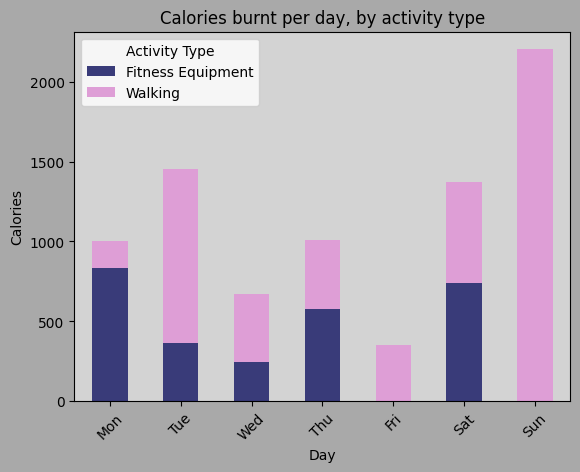

In [14]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
df = pd.DataFrame(activity_calories)

# Group the dataframe by the 'Day' and 'Activity Type' columns, then sum the values and unstack.
grouped = df.groupby(['Day','Activity Type']).sum()['Value'].unstack()
#print(grouped)

# Reorder bars
order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = grouped.loc[order].plot(kind='bar', stacked=True, colormap='tab20b')

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('darkgrey')
# Set the color of the graph itself
ax.set_facecolor('lightgrey')

# Label axis'
plt.xlabel('Day')
plt.ylabel('Calories')
plt.title('Calories burnt per day, by activity type')

# Customize x ticks
plt.xticks(rotation=45)

# Show me the dam thing
plt.show()